In [1]:
import pandas as pd

import matplotlib as mpl
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
print(mpl.__version__)
# seaborn 스타일 사용
plt.style.use('seaborn-notebook')

# matplotlib 그래프 한글폰트 깨질 때 대처(Mac & Window)
import platform
if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
# 그래프에서 마이너스 기호가 표시되도록 하는 설정
mpl.rcParams['axes.unicode_minus'] = False

import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


3.4.3


# 3.3 꺽은 선 그래프

## 코로나 발생 주요국가 동향 꺽은 선 그래프 만들기

In [36]:
data = pd.read_csv('data/주요발생국가주간동향(4월2째주).csv',index_col='국가')

In [37]:
data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
미국,335524,364723,387547,424945,461437,495535,524903
스페인,130709,135032,140510,146690,152446,157022,161852
이탈리아,128948,132547,135586,139422,143626,147577,152271
독일,100024,102453,107591,112113,118181,122171,124908
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991
이란,58226,60500,62589,64586,66220,68192,70029
스위스,21104,21652,22241,22789,23574,24308,24900


In [12]:
chartdata = data['4월06일']
chartdata

0    335524
1    130709
2    128948
3    100024
4     70478
5     81708
6     47806
7     58226
8     21104
9     10284
Name: 4월06일, dtype: int64

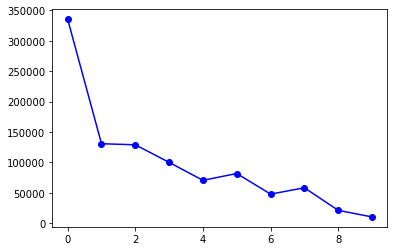

In [15]:
# series로 plot
plt.plot(chartdata, color = 'blue', linestyle='solid', marker='o')

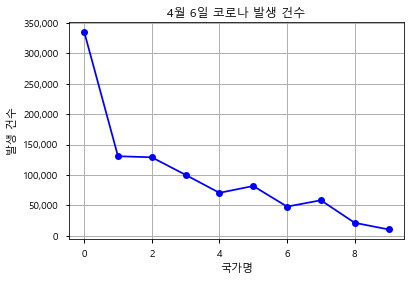

In [32]:
# y축 숫자 콤마로 지정
YTICKS_INTERVAL = 50000
maxlim = (int(chartdata.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)
plt.plot(chartdata, color = 'blue', linestyle='solid', marker='o')

plt.yticks(values, ['%s' % format(val, ',') for val in values])

plt.grid(True)
plt.xlabel('국가명')
plt.ylabel("발생 건수")
plt.title("4월 6일 코로나 발생 건수")
plt.show()

In [ ]:
# datafrane으로 plot

In [41]:
COUNTRY = ['스페인', '프랑스', '독일', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']
chartdata = data.loc[COUNTRY,WHEN]
chartdata = chartdata.T

In [45]:
chartdata

국가,스페인,프랑스,독일,중국,영국,이란
4월06일,130709,70478,100024,81708,47806,58226
4월07일,135032,74390,102453,81740,51608,60500
4월08일,140510,78167,107591,81802,55242,62589
4월09일,146690,82048,112113,81865,60733,64586
4월10일,152446,86334,118181,81907,65077,66220


<AxesSubplot:title={'center':'SomeTitle'}>

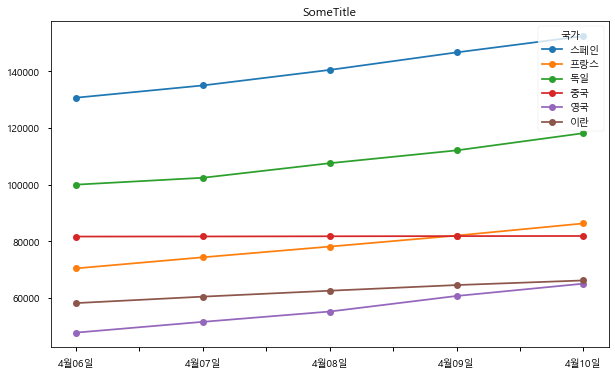

In [48]:
chartdata.plot(title='SomeTitle', figsize=(10,6), legend=True, marker='o', rot=0)
#legend = 색인 /// rot = x축 글씨 회전각도

### 이중 축 꺽은 선 그래프

In [53]:
myframe = pd.read_csv('data/tips.csv')
myframe

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


In [54]:
myframe.describe()

,Unnamed: 0,total_bill,tip,size
count,244.000000,244.000000,244.000000,244.000000
mean,121.500000,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.951100
min,0.000000,3.070000,1.000000,1.000000
25%,60.750000,13.347500,2.000000,2.000000
50%,121.500000,17.795000,2.900000,2.000000
75%,182.250000,24.127500,3.562500,3.000000
max,243.000000,50.810000,10.000000,6.000000


In [60]:
xrange = range(len(myframe))
data_bill = myframe.loc[:, ['total_bill']]
data_tip = myframe.loc[:, ['tip']]

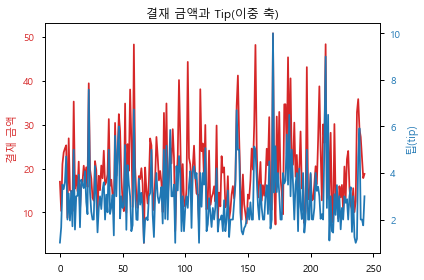

In [61]:
fig, ax1 = plt.subplots()
ax1.set_title('결재 금액과 Tip(이중 축)')

color = 'tab:red'

ax1.set_ylabel('결재 금액', color=color)
ax1.plot(xrange, data_bill, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('팁(tip)', color=color)
ax2.plot(xrange, data_tip, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()

# 3.4 산점도 그래프

In [62]:
mpg = pd.read_csv('data/mpg.csv', encoding='utf-8')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


### 엔진 크기에 대한 주행 마일수의 산점도 그래프

In [63]:
xdata = mpg.loc[:, ['displ']]
ydata = mpg.loc[:, ['hwy']]

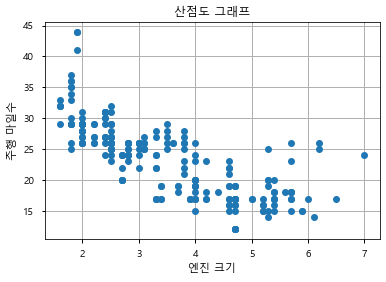

In [65]:
plt.figure()
plt.plot(xdata,ydata, marker='o', linestyle='none')
plt.xlabel('엔진 크기')
plt.ylabel('주행 마일수')
plt.title('산점도 그래프')
plt.grid(True)

### 구동 방식에 의한 색상 구분하기

In [68]:
mycolors = ['r', 'g', 'b']
label_dict = {'f':'전륜 구동', '4':'사륜 구동', 'r':'후륜 구동'}

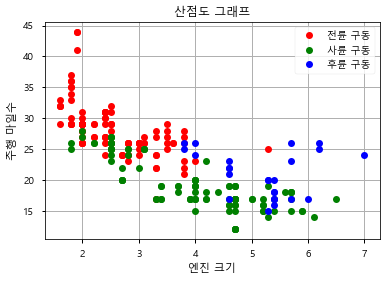

In [69]:
plt.figure()

idx = 0 # 색상 구분을 위한 카운터 변수
labels = mpg['drv'].unique() # ['f' '4' 'r']

for finditem in labels:
    xdata = mpg.loc[mpg['drv'] == finditem, 'displ']
    ydata = mpg.loc[mpg['drv'] == finditem, 'hwy']
    plt.plot(xdata, ydata, color=mycolors[idx], marker='o', linestyle='None', label=label_dict[finditem])
    idx += 1

plt.legend()
plt.xlabel("엔진 크기")
plt.ylabel("주행 마일수")
plt.title("산점도 그래프")
plt.grid(True)

### 참고 : 산점도와 히스토그램 동시에 그리기

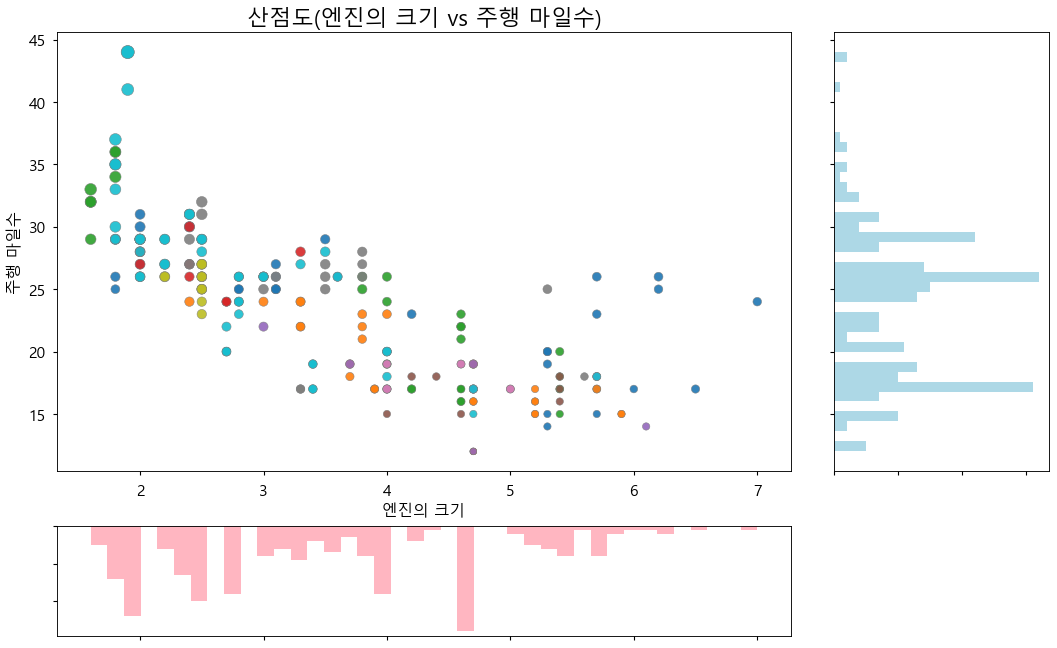

In [70]:
fig = plt.figure(figsize=(16, 10), dpi= 80)
grid = plt.GridSpec(4, 4, hspace=0.5, wspace=0.2)

# 축을 정의합니다.
ax_main = fig.add_subplot(grid[:-1, :-1])
ax_right = fig.add_subplot(grid[:-1, -1], xticklabels=[], yticklabels=[])
ax_bottom = fig.add_subplot(grid[-1, 0:-1], xticklabels=[], yticklabels=[])

# 메인 그래프에 산점도를 그립니다.
ax_main.scatter('displ', 'hwy', s=mpg.cty*4, c=mpg.manufacturer.astype('category').cat.codes, 
                alpha=.9, data=mpg, cmap="tab10", edgecolors='gray', linewidths=.5)

# 하단의 histogram
ax_bottom.hist(mpg.displ, 40, histtype='stepfilled', orientation='vertical', color='lightpink')
ax_bottom.invert_yaxis()

# 오른쪽 histogram
ax_right.hist(mpg.hwy, 40, histtype='stepfilled', orientation='horizontal', color='lightblue')

# Decorations
ax_main.set(title='산점도(엔진의 크기 vs 주행 마일수)', xlabel='엔진의 크기', ylabel='주행 마일수')
ax_main.title.set_fontsize(20)
for item in ([ax_main.xaxis.label, ax_main.yaxis.label] + ax_main.get_xticklabels() + ax_main.get_yticklabels()):
    item.set_fontsize(14)

### 다이아몬드 데이터셋과 산점도

In [71]:
diamonds = pd.read_csv('data/diamonds.csv')
diamonds

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [73]:
# 데이터가 매우 커서 전체의 일부분만 샘플링
FRACTION = 0.005
diamonds = diamonds.sample(frac=FRACTION)

In [74]:
xdata = diamonds['price'] # x축
ydata = diamonds['depth'] # y축
table = diamonds['table']  # 원의 크기

In [75]:
mycolor = ['r', 'g', 'b', 'y', 'm']
cut_list = diamonds['cut'].unique()
cut_list

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [77]:
cut_dict = {cut_list[idx]:mycolor[idx] for idx in range(len(cut_list))}
cut_dict

{'Ideal': 'r', 'Premium': 'g', 'Good': 'b', 'Very Good': 'y', 'Fair': 'm'}

In [78]:
def recode_cut(cut):
    return cut_dict[cut]

In [79]:
# 문자열 데이터를 숫자형으로 변환
diamonds['newcut'] = diamonds['cut'].apply(recode_cut)
newcut = diamonds['newcut'] # 범주형 자료(숫자형)

In [81]:
def recode_table(table):
    if table >= 60:
        return 100
    elif table >= 58:
        return 30
    elif table >= 54:
        return 5
    else :
        return 1

In [82]:
diamonds['newtable'] = diamonds['table'].apply(recode_table)
newtable = diamonds['newtable'] # 범주형 자료(숫자형)

In [83]:
diamonds.loc[:, ['price', 'depth', 'newtable', 'table', 'newcut']]

,price,depth,newtable,table,newcut
38631,489,62.1,5,55.0,r
19537,8170,61.1,30,58.0,g
19642,8257,60.8,5,56.0,r
53789,2729,61.8,5,56.0,r
47783,1897,61.3,5,56.0,r
...,...,...,...,...,...
47023,1819,61.9,5,56.0,r
20363,8758,60.9,5,57.0,r
15204,6108,62.9,30,58.0,g
26854,16779,59.9,100,60.0,g


Text(0, 0.5, 'Depth')

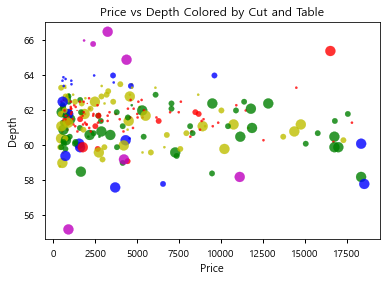

In [84]:
import matplotlib.pyplot as plt
scatter_plot = plt.figure()
ax1 = scatter_plot.add_subplot(1, 1, 1)

# 매개 변수
# 's'는 도형의 크기를 지정합니다.
# 'c'는 색상 이름 또는 숫자의 연속형이면 됩니다.
ax1.scatter(x=xdata, y=ydata, s=newtable, c=newcut, alpha=0.8)

ax1.set_title('Price vs Depth Colored by Cut and Table')
ax1.set_xlabel('Price')
ax1.set_ylabel('Depth')

# 3.5 막대 그래프

### 3.5.1 특정 일자 일변량 막대 그래프

In [2]:
data = pd.read_csv('data/주요발생국가주간동향(4월2째주).csv',index_col='국가')

In [3]:
data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
미국,335524,364723,387547,424945,461437,495535,524903
스페인,130709,135032,140510,146690,152446,157022,161852
이탈리아,128948,132547,135586,139422,143626,147577,152271
독일,100024,102453,107591,112113,118181,122171,124908
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991
이란,58226,60500,62589,64586,66220,68192,70029
스위스,21104,21652,22241,22789,23574,24308,24900


In [6]:
# 모듈화
# plt.bar() 메소드를 사용한 막대 그래프
def MakeBarChart01(x, y, color, xlabel, ylabel, title):
    plt.figure()
    plt.bar(x, y, color=color, alpha=0.7) #alpha : 투명도
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    # plt.grid(True)

    YTICKS_INTERVAL = 50000

    maxlim = (int(y.max() / YTICKS_INTERVAL) + 1) * YTICKS_INTERVAL
    print(maxlim)

    values = np.arange(0, maxlim + 1, YTICKS_INTERVAL)

    plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # 그래프 위에 건수와 비율 구하기
    ratio = 100 * y / y.sum()
    print(ratio)
    

    plt.rc('font', size=6)
    for idx in range(y.size):
        value = format(y[idx], ',') + '건'  # 예시 : 60건
        ratioval = '%.1f%%' % (ratio[idx])  # 예시 : 20.0%
        # 그래프의 위에 "건수" 표시
        plt.text(x=idx, y=y[idx] + 1, s=value, horizontalalignment='center')
        # 그래프의 중간에 비율 표시
        plt.text(x=idx, y=y[idx] / 2, s=ratioval, horizontalalignment='center')

    # 평균 값을 수평선으로 그리기
    meanval = y.mean()
    print(meanval)

    average = '평균 : %d건' % meanval
    plt.axhline(y=meanval, color='r', linewidth=1, linestyle='dashed')
    plt.text(x=y.size - 1, y=meanval + 200, s=average, horizontalalignment='center')

In [8]:
chartdata = data['4월06일']
chartdata

국가
미국      335524
스페인     130709
이탈리아    128948
독일      100024
프랑스      70478
중국       81708
영국       47806
이란       58226
스위스      21104
한국       10284
Name: 4월06일, dtype: int64

In [9]:
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
mycolor = colors[0:len(chartdata)]

350000
국가
미국      34.069888
스페인     13.272496
이탈리아    13.093680
독일      10.156670
프랑스      7.156500
중국       8.296820
영국       4.854332
이란       5.912403
스위스      2.142949
한국       1.044261
Name: 4월06일, dtype: float64
98481.1


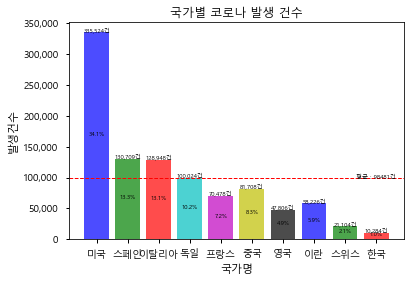

In [10]:
# 4월 6일 그래프
MakeBarChart01(x=chartdata.index, y=chartdata, color=mycolor, xlabel='국가명', 
               ylabel='발생건수', title='국가별 코로나 발생 건수')

### 특정 국가별 일별 다변량 막대 그래프

In [11]:
COUNTRY = ['프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일']
data = data.loc[COUNTRY, WHEN]
data.index.name = '국가명'
data.columns.name = '일자'
data

일자,4월06일,4월07일,4월08일
국가명,,,
프랑스,70478,74390,78167
중국,81708,81740,81802
영국,47806,51608,55242
이란,58226,60500,62589


In [13]:
##### 참고 
# 데이터 프레임을 사용하여 막대 그래프를 그려 주는 함수입니다.
def MakeBarChart02(chartdata, rotation, title, ylim=None, stacked=False, yticks_interval = 10000):
    plt.figure()
    # 범례에 제목을 넣으려면 plot() 메소드의 legend 옵션을 사용해야 합니다.
    chartdata.plot(kind='bar', rot=rotation, title=title, legend=True, stacked=stacked)

    plt.legend(loc='best')

    print(chartdata)

    if stacked == False :
        # max(chartdata.max())은 항목들 값 중에서 최대 값을 의미합니다.
        maxlim = (int(max(chartdata.max()) / yticks_interval) + 1) * yticks_interval
        # print(maxlim)
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])
    else : # 누적 막대 그래프
        # 국가별 누적 합인 chartdata.sum(axis=1))의 최대 값에 대한 연산이 이루어 져야 합니다.
        maxlim = (int(max(chartdata.sum(axis=1)) / yticks_interval) + 1) * yticks_interval
        # print(maxlim)
        values = np.arange(0, maxlim + 1, yticks_interval)
        plt.yticks(values, ['%s' % format(val, ',') for val in values])

    # y축의 상하한 값이 주어 지는 경우에만 설정합니다.
    if ylim != None :
        plt.ylim(ylim)

일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589


<Figure size 432x288 with 0 Axes>

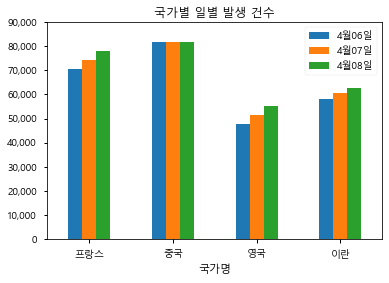

In [14]:
MakeBarChart02(chartdata=data, rotation=0, title='국가별 일별 발생 건수' )

국가명      프랑스     중국     영국     이란
일자                               
4월06일  70478  81708  47806  58226
4월07일  74390  81740  51608  60500
4월08일  78167  81802  55242  62589


<Figure size 432x288 with 0 Axes>

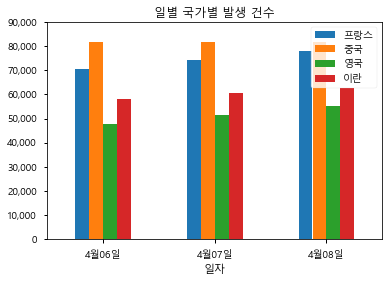

In [15]:
# 전치
dataT = data.T
MakeBarChart02(chartdata=dataT, rotation=0, title='일별 국가별 발생 건수')

### 일별 국가별 누적 막대 그래프

일자   4월06일  4월07일  4월08일
국가명                     
프랑스  70478  74390  78167
중국   81708  81740  81802
영국   47806  51608  55242
이란   58226  60500  62589


<Figure size 432x288 with 0 Axes>

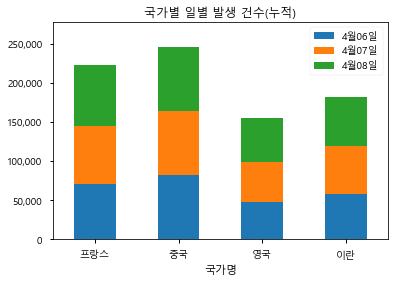

In [16]:
ymax = dataT.sum(axis=1)
ymaxlimit = ymax.max() + 10

MakeBarChart02(chartdata=data, rotation=0, title='국가별 일별 발생 건수(누적)', 
               ylim=[0, ymaxlimit], stacked=True, yticks_interval=50000)

### 국가별 일별 누적 가로 막대 그래프

In [18]:
data = pd.read_csv('data/주요발생국가주간동향(4월2째주).csv',index_col='국가')
three = [item for item in data.index if item in ['프랑스', '영국', '중국']]
three

['프랑스', '중국', '영국']

In [19]:
data = data.loc[three]
data

,4월06일,4월07일,4월08일,4월09일,4월10일,4월11일,4월12일
국가,,,,,,,
프랑스,70478,74390,78167,82048,86334,90276,93790
중국,81708,81740,81802,81865,81907,81953,82052
영국,47806,51608,55242,60733,65077,73758,78991


In [20]:
column_names = data.columns.tolist()
column_names

['4월06일', '4월07일', '4월08일', '4월09일', '4월10일', '4월11일', '4월12일']

In [21]:
# 국가별 numpy 배열을 저장하고 있는 사전
chartdata = {}

for row in data.index:
    # data.loc[row])
    # type(row))
    chartdata[row] = data.loc[row].values

chartdata

{'프랑스': array([70478, 74390, 78167, 82048, 86334, 90276, 93790], dtype=int64),
 '중국': array([81708, 81740, 81802, 81865, 81907, 81953, 82052], dtype=int64),
 '영국': array([47806, 51608, 55242, 60733, 65077, 73758, 78991], dtype=int64)}

In [23]:
def MakeBarChart03(chartdata, column_names):
    labels = list(chartdata.keys())
    data = np.array(list(chartdata.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(column_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(column_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='small')


    return fig, ax

(<Figure size 662.4x360 with 1 Axes>, <AxesSubplot:>)

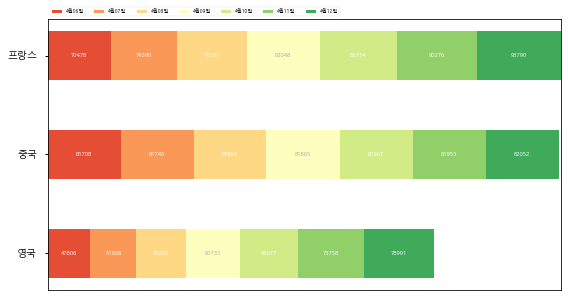

In [24]:
MakeBarChart03(chartdata, column_names)

### 서브 플로팅 사용하기

In [25]:
def MakeBarChart04(chartdata, suptitle):
    fig, axes = plt.subplots(nrows=2, ncols=1)  # 2행 1열

    chartdata.plot(kind='bar', ax=axes[0], rot=0, alpha=0.7)

    # color='m'은 자홍색
    chartdata.plot(kind='barh', ax=axes[1], color='m', alpha=0.7)

    fig.suptitle(suptitle)  # sup : super

In [26]:
data = pd.read_csv('data/주요발생국가주간동향(4월2째주).csv',index_col='국가')
only_usa = [item for item in data.index if item in ['미국']]

data = data.loc[only_usa].T
data

국가,미국
4월06일,335524
4월07일,364723
4월08일,387547
4월09일,424945
4월10일,461437
4월11일,495535
4월12일,524903


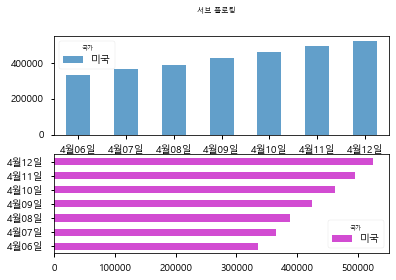

In [27]:
MakeBarChart04(chartdata=data, suptitle='서브 플로팅')

### 테이블이 있는 막대 그래프

In [28]:
data = pd.read_csv('data/주요발생국가주간동향(4월2째주).csv',index_col='국가')

In [29]:
COUNTRY = ['스페인', '프랑스', '중국', '영국', '이란']
WHEN = ['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']
data = data.loc[COUNTRY, WHEN]
data

,4월06일,4월07일,4월08일,4월09일,4월10일
국가,,,,,
스페인,130709,135032,140510,146690,152446
프랑스,70478,74390,78167,82048,86334
중국,81708,81740,81802,81865,81907
영국,47806,51608,55242,60733,65077
이란,58226,60500,62589,64586,66220


In [30]:
# rows : 테이블에 보이는 행 색인 내용
rows = [x for x in data.index]
rows

['스페인', '프랑스', '중국', '영국', '이란']

In [31]:
# columns : 테이블에 보이는 열 색인 내용
columns = [x for x in data.columns]
columns

['4월06일', '4월07일', '4월08일', '4월09일', '4월10일']

In [32]:
n_rows = len(data) # 행 수
n_rows

5

In [33]:
LEFT_MARGIN = 0.3
index = np.arange(len(columns)) + LEFT_MARGIN
index

array([0.3, 1.3, 2.3, 3.3, 4.3])

In [34]:
bar_width = 1 - 2 * LEFT_MARGIN # 막대 그래프의 너비

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))
y_offset

array([0., 0., 0., 0., 0.])

[130709, 135032, 140510, 146690, 152446]
[130709. 135032. 140510. 146690. 152446.]
[70478, 74390, 78167, 82048, 86334]
[201187. 209422. 218677. 228738. 238780.]
[81708, 81740, 81802, 81865, 81907]
[282895. 291162. 300479. 310603. 320687.]
[47806, 51608, 55242, 60733, 65077]
[330701. 342770. 355721. 371336. 385764.]
[58226, 60500, 62589, 64586, 66220]
[388927. 403270. 418310. 435922. 451984.]


Text(0.5, 1.0, '테이블이 있는 막대 그래프')

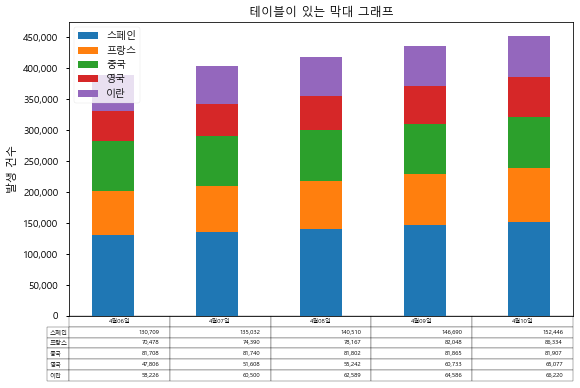

In [35]:
# Plot bars and create text labels for the table
cell_text = [] # 표에 들어 가는 텍스트 내용
plt.figure(figsize=(10, 6))

for row in data.index:
    # print(data[row])
    chartdata = data.loc[row].tolist()
    print(chartdata)

    # bottom
    plt.bar(index, chartdata, bar_width, bottom=y_offset, label=row)

    # y_offset에는 열 단위로 누적된 값이 들어 갑니다.
    y_offset = y_offset + chartdata
    # y_offset = chartdata
    print(y_offset)

    cell_text.append([format(x, ',') for x in chartdata])
    # cell_text.append([format(x, ',') for x in y_offset])
# end for

the_table = plt.table(cellText=cell_text, rowLabels=rows, colLabels=columns, loc='bottom')

plt.legend(loc='best')
# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("발생 건수")

# values : y축의 눈금의 상한 값과 간격 지정하기
YTICKS_INTERVAL = 50000 # 단위 눈금 간격
maxlim = (int(y_offset.max()/YTICKS_INTERVAL)+1)*YTICKS_INTERVAL
maxlim

values = np.arange(0, maxlim, YTICKS_INTERVAL)

plt.yticks(values, ['%s' % format(val, ',') for val in values])
plt.xticks([])
plt.title('테이블이 있는 막대 그래프')